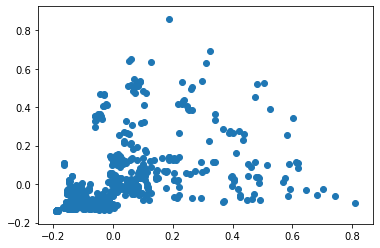

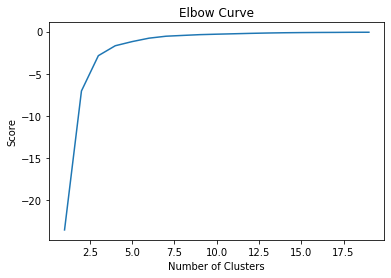

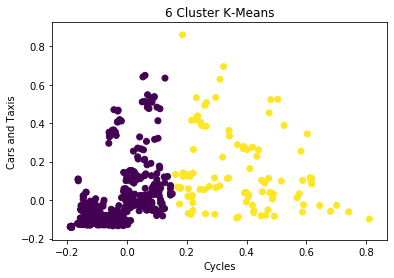

In [26]:
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

variables = pd.read_csv('cityoflondon.csv')
Y = variables[['CarsTaxis']]
X = variables[['PedalCycles']]
StartJunction = variables[['StartJunction']]
EndJunction = variables[['EndJunction']]

X_norm = (X - X.mean()) / (X.max() - X.min())
Y_norm = (Y - Y.mean()) / (Y.max() - Y.min())
pl.scatter(Y_norm,X_norm)
pl.show()

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y_norm).score(Y_norm) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

pca = PCA(n_components=1).fit(Y_norm)
pca_d = pca.transform(Y_norm)
pca_c = pca.transform(X_norm)

kmeans=KMeans(n_clusters=2)  #NUMBER OF CLUSTERS
kmeansoutput=kmeans.fit(Y_norm)
kmeansoutput
pl.figure('6 Cluster K-Means')
pl.scatter(pca_d[:, 0], pca_c[:, 0], c=kmeansoutput.labels_)

labels=kmeansoutput.labels_
labels=pd.DataFrame(labels)

frames = [StartJunction, EndJunction, labels]
result = pd.concat(frames)

pl.xlabel('Cycles')
pl.ylabel('Cars and Taxis')
pl.title('6 Cluster K-Means')
pl.show()